We want to specify parameter $\alpha,\beta$ to fit data. 

$$
y = e^{\alpha + \beta x}
$$

Whether the two optimzing problems get same result?

$$
\min_{\alpha,\beta} \sum_{i=1}^n (y_i - e^{\alpha + \beta x_i})^2
$$

and

$$
\min_{\alpha,\beta} \sum_{i=1}^n (\log y_i - (\alpha + \beta x_i))^2
$$

In [122]:
import numpy as np
from scipy.optimize import minimize,least_squares
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('ggplot')


In [2]:
p=0.95
n=200



In [10]:
g = np.random.geometric(1-p,size=n)
succ = g - 1
N = succ.max()
s = np.zeros((n,N))
for i in range(n):
    s[i,np.arange(succ[i])] = 1
S = np.sum(s,axis=0)

In [11]:
S

array([ 187.,  175.,  162.,  159.,  155.,  145.,  142.,  132.,  127.,
        119.,  114.,  109.,  103.,   99.,   92.,   85.,   80.,   72.,
         67.,   62.,   59.,   56.,   52.,   51.,   48.,   47.,   45.,
         45.,   43.,   40.,   40.,   37.,   36.,   36.,   35.,   33.,
         32.,   31.,   26.,   25.,   24.,   23.,   22.,   21.,   21.,
         20.,   19.,   19.,   18.,   18.,   17.,   17.,   16.,   16.,
         15.,   15.,   14.,   14.,   14.,   13.,   13.,   13.,   12.,
         12.,   11.,   11.,   11.,   11.,    9.,    9.,    9.,    7.,
          7.,    7.,    7.,    7.,    5.,    5.,    5.,    5.,    5.,
          5.,    5.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,
          4.,    3.,    3.,    2.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,

In [12]:
y = S
x = np.arange(1,N+1)

In [15]:
def generate(p,n,only_S = False):
    g = np.random.geometric(1-p,size=n)
    succ = g - 1
    N = succ.max()
    s = np.zeros((n,N))
    for i in range(n):
        s[i,np.arange(succ[i])] = 1
    S = np.sum(s,axis=0)
    if only_S:
        return S
    x = np.arange(1,N+1)
    return x,S

In [38]:
x,y = generate(0.97,2000)

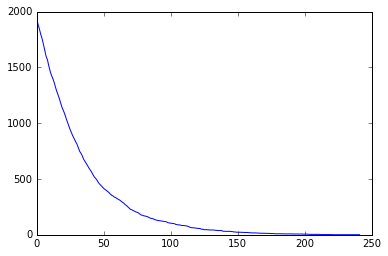

In [39]:
plt.plot(y)

In [36]:
def fun1(p):
    a,b = p
    yy = np.exp(a + b*x)
    return np.sum((y - yy)**2)

def fun2(p):
    a,b = p
    logy = np.log(y)
    logyy = a + b*x
    return np.sum((logy-logyy)**2)



In [37]:
minimize(fun1,x0 = (-1,-1),method='BFGS')

C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in square
C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:562: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
C:\Users\yiyuezhuo\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in square


      fun: 380579.8427603012
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ -80.140625 , -122.6171875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 39
      nit: 0
     njev: 7
   status: 2
  success: False
        x: array([-1., -1.])

In [40]:
res = minimize(fun2,x0 = (-1,-1))
res

      fun: 11.316121340725946
 hess_inv: array([[  8.31590837e-03,  -5.14386061e-05],
       [ -5.14386061e-05,   4.23362915e-07]])
      jac: array([ -1.19209290e-07,  -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 7.7265517 , -0.03114409])

In [41]:
a,b = res.x
np.exp(a),np.exp(b)

(2267.7687553661776, 0.96933589485754146)

In [62]:
def fun3(p):
    cut = 50
    a,b = p
    logy = np.log(y[cut:])
    logyy = a + b*x[cut:]
    return np.sum((logy-logyy)**2)


In [63]:
res2 = minimize(fun3,x0 = (-1,-1))
a,b = res2.x
np.exp(a),np.exp(b)

(2629.4397847909468, 0.96850174896659136)

Let's try it on real data.

In [44]:
data_file_name='data.csv'
df=pd.read_csv(data_file_name)

In [93]:
df.head()

,id,content,des_len,diff,hit,id.1,solve,t_content
0,1,187,25,5,13792,1,537234,85
1,2,312,32,5,7571,2,438350,135
2,3,111,17,5,6364,3,317208,65
3,4,209,20,5,5414,4,285419,101
4,5,206,24,5,4627,5,297082,70


In [90]:
log = np.log
exp = np.exp
res = smf.ols('log(solve) ~ id',data=df).fit()

In [91]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(solve)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1466.
Date:                Mon, 01 May 2017   Prob (F-statistic):          7.30e-109
Time:                        22:07:29   Log-Likelihood:                -255.98
No. Observations:                 262   AIC:                             516.0
Df Residuals:                     260   BIC:                             523.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.4630      0.080    143.363      0.000        11.306    11.620
id            -0.0202      0.001    -38.287      0.000        -0.021    -0.019
==============================================================================
Omnibus:                       22.352   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.530
Skew:                           0.712   Prob(JB):                     2.86e-06
Kurtosis:                       3.558   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
logn,logp = res.params
exp(logn),exp(logp)

(95132.768745309499, 0.98002165648895589)

In [109]:
cut = df.shape[0]//10
df2 = df.ix[:cut]
df3 = df.ix[cut:]

In [110]:
res = smf.ols('log(solve) ~ id',data=df2).fit()
logn,logp = res.params
exp(logn),exp(logp)

(425752.36210311513, 0.92758983628363301)

In [111]:
res = smf.ols('log(solve) ~ id',data=df3).fit()
logn,logp = res.params
exp(logn),exp(logp)

(61664.20658032129, 0.98240025301503431)

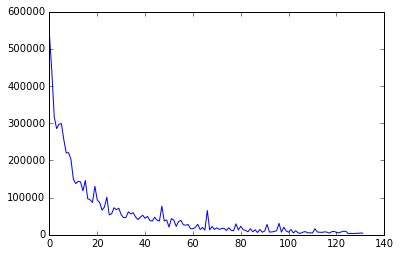

In [82]:
plt.plot(log(df2.solve))

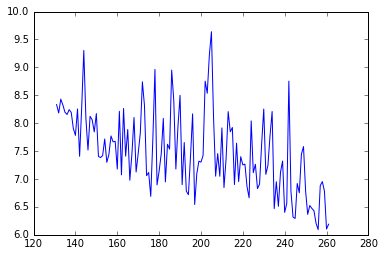

In [86]:
plt.plot(log(df3.solve))

In [85]:
res.params

Intercept    17.663259
log(id)      -1.932395
dtype: float64

In [104]:
df4 = df3.copy()
df4['id'] -= df4['id'].min() -1

In [106]:
res = smf.ols('log(solve) ~ id',data=df4).fit()
logn,logp = res.params
exp(logn),exp(logp)

(3536.9652969608965, 0.98974753393117876)

In [113]:
res = smf.ols('log(solve) ~ id',data=df).fit()
logn,logp = res.params
n,p = exp(logn),exp(logp)
n,p

(95132.768745309499, 0.98002165648895589)

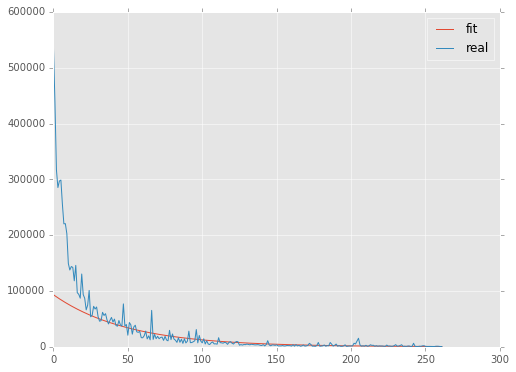

In [123]:

plt.plot(n*p**df.id,label='fit')
plt.plot(df.solve,label='real')
plt.legend()
plt.show()